<h1> Dimensionality Reduction </h1>


<h2>PCA example from statquest</h2>

In [ ]:
## NOTE: This is Python 3 code.
import pandas as p
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt #

In [7]:
#########################
## Data Generation Code
##########################
## In this example, the data is in a data frame called data.
## Columns are individual samples (i.e. cells)
## Rows are measurements taken for all the samples (i.e. genes)
## Just for the sake of the example, we'll use made up data...
genes = ['gene' + str(i) for i in range(1,101)]
 
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
 
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
 
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
 
print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  376  422  360  338  356   87   81   90   77   74
gene2   36   29   25   33   29  906  934  868  888  840
gene3  111  123  131  118  106  191  209  205  180  184
gene4  118  147  126  147  132  277  256  246  251  247
gene5  444  439  487  452  436  197  203  208  223  202
(100, 10)


In [10]:
#########################
## Perform PCA on the data
##########################
# First center and scale the data
scaled_data = preprocessing.scale(data.T) #transpose because of the dataframe orientation, generally won't be necessary
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coord

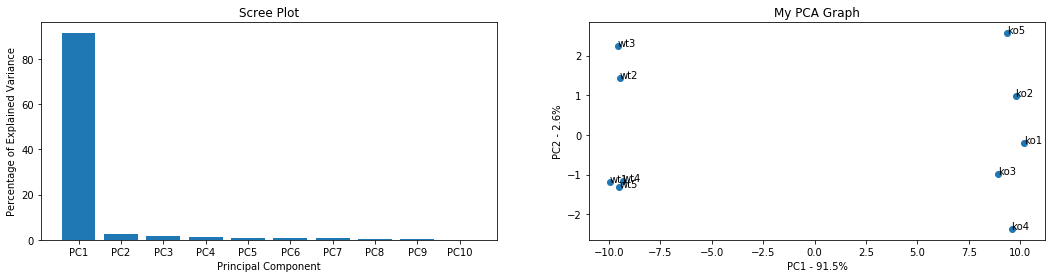

In [32]:
#########################
## Draw a scree plot and a PCA plot
##########################
 
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(18,4))
plt.subplot(121)

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')

 
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.subplot(122)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()
 

In [24]:
#########################
## Determine which genes had the biggest influence on PC1
##########################
 ## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene7    -0.104443
gene69    0.104432
gene34    0.104423
gene31    0.104411
gene2     0.104408
gene25    0.104407
gene10    0.104405
gene23    0.104388
gene93    0.104385
gene74   -0.104383
dtype: float64


In [3]:
printA()

asdfasdfasdfa


In [1]:
path="./data"
import sys
sys.path.insert(0, path)

from  dataForPca import *

In [2]:
printA()

asdfasdfasdfa


In [ ]:
def printB():
    print("b")

In [ ]:
printB()